In [7]:
%load_ext autoreload
%autoreload 1
%aimport utils
%aimport solvers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import tushare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import sys
import factors

In [9]:
# k-nearest neighbor estimator with k = 50
PnL_table = utils.backtest.resample_experiments_conditional_fama_french(exp_num=50, 
                                                                        sample_stock_num=20, 
                                                                        solver=solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel,
                                                                        solver_name_prefix='fama_french_',
                                                                        reg_params=1)

In [10]:
PnL_table_equal_weight = utils.backtest.resample_experiments(
    exp_num = 50, 
    sample_stock_num = 20, 
    solver = solvers.simple.equal_weight, 
)

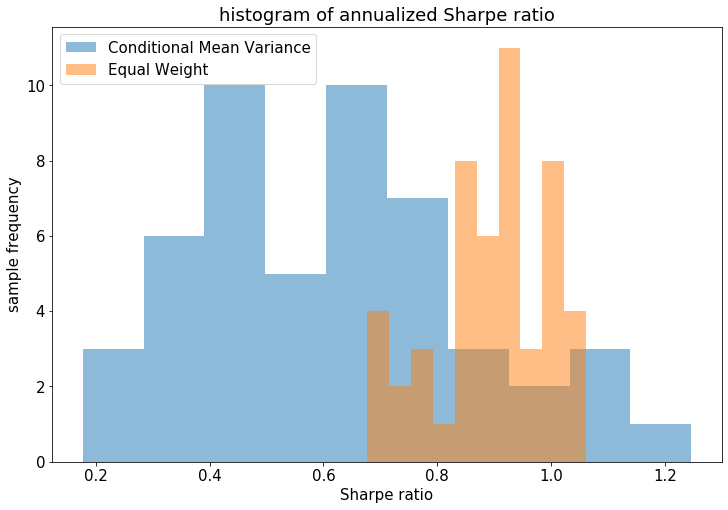

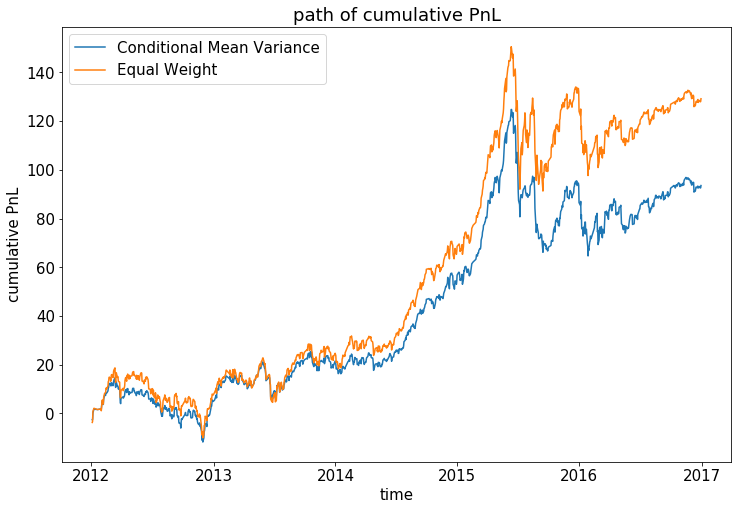

Sharpe Ratio:
Conditional Mean Variance                         	mean:0.620	std:0.252
Equal Weight                                      	mean:0.894	std:0.098


In [11]:
SEED = 42; exp_num = 50;
conditional_model_config = utils.backtest_result.ModelConfig(
    model_name='Conditional Mean Variance',
    solver=solvers.meanvariance.mean_variance_long_only_opt_mosek_kernel,
    solver_name_prefix='fama_french_',
    reg_params=1)
equal_weight_model_config = utils.backtest_result.ModelConfig(
    model_name='Equal Weight',
    solver=solvers.simple.equal_weight
)
model_config_list=[conditional_model_config, equal_weight_model_config]
utils.backtest_result.plot_backtest_result(exp_num, SEED, model_config_list)